In [1]:
# import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load and Explore the Data
# Load the dataset
df = pd.read_excel('myexcel.xlsx')  # or pd.read_csv() if CSV

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [17]:
# Data Preprocessing
# Fix height column - replace with random values 150-180
np.random.seed(42)
df['Height'] = np.random.randint(150, 181, size=len(df))

# Check for missing values
df.isnull().sum()

# Handle missing salaries
df['Salary'].fillna(0, inplace=True)
df.to_excel('cleaned_nba_players.xlsx', index=False)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0,22-25
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0,22-25
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,0.0,26-29
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0,18-21
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0,26-29


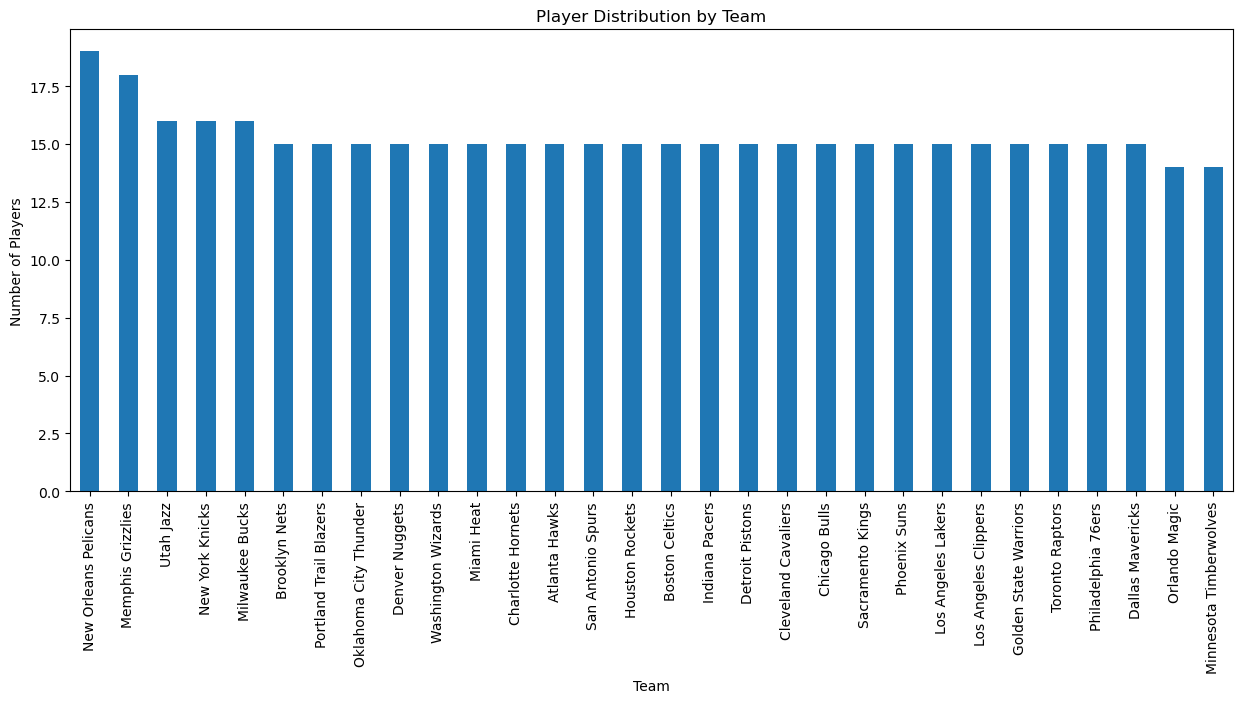

In [11]:
#Analysis Tasks

# TASK 1: Player Distribution by Team

# Count players per team
team_dist = df['Team'].value_counts()

# Calculate percentages
team_percent = (team_dist / len(df)) * 100

# Visualization
plt.figure(figsize=(15,6))
team_dist.plot(kind='bar')
plt.title('Player Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

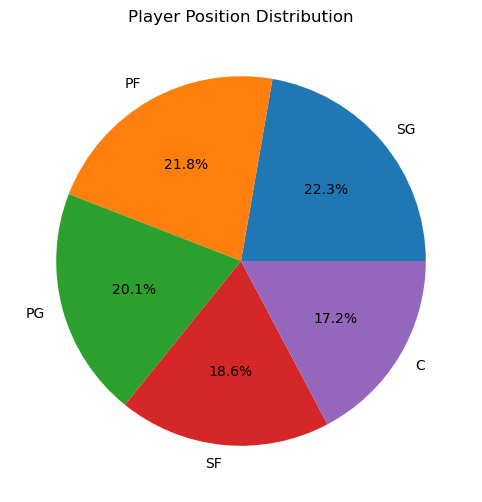

In [12]:
# Task 2: Position Segregation

# Group by position
position_dist = df['Position'].value_counts()

# Visualization
plt.figure(figsize=(8,6))
position_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Player Position Distribution')
plt.ylabel('')
plt.show()


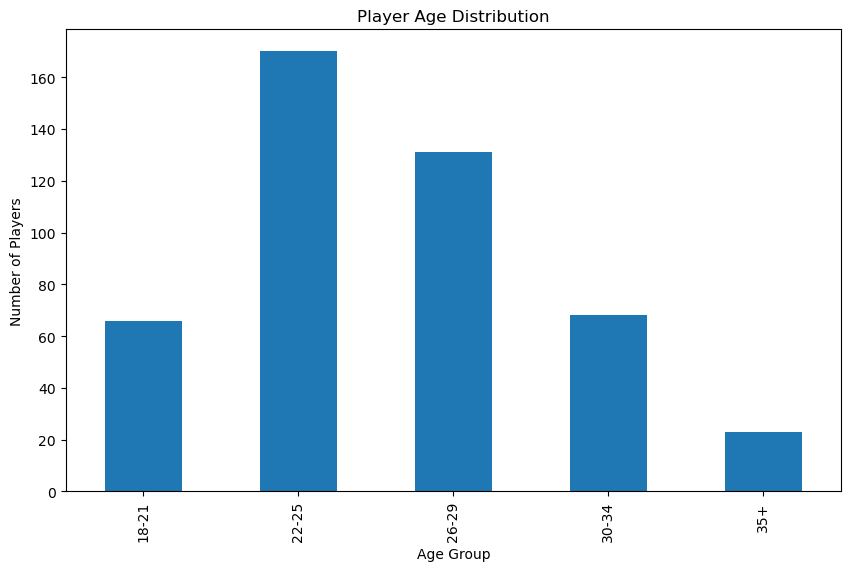

In [13]:
# Task 3: Age Distribution

# Create age groups
bins = [18, 22, 26, 30, 35, 40]
labels = ['18-21', '22-25', '26-29', '30-34', '35+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualization
plt.figure(figsize=(10,6))
df['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Player Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.show()

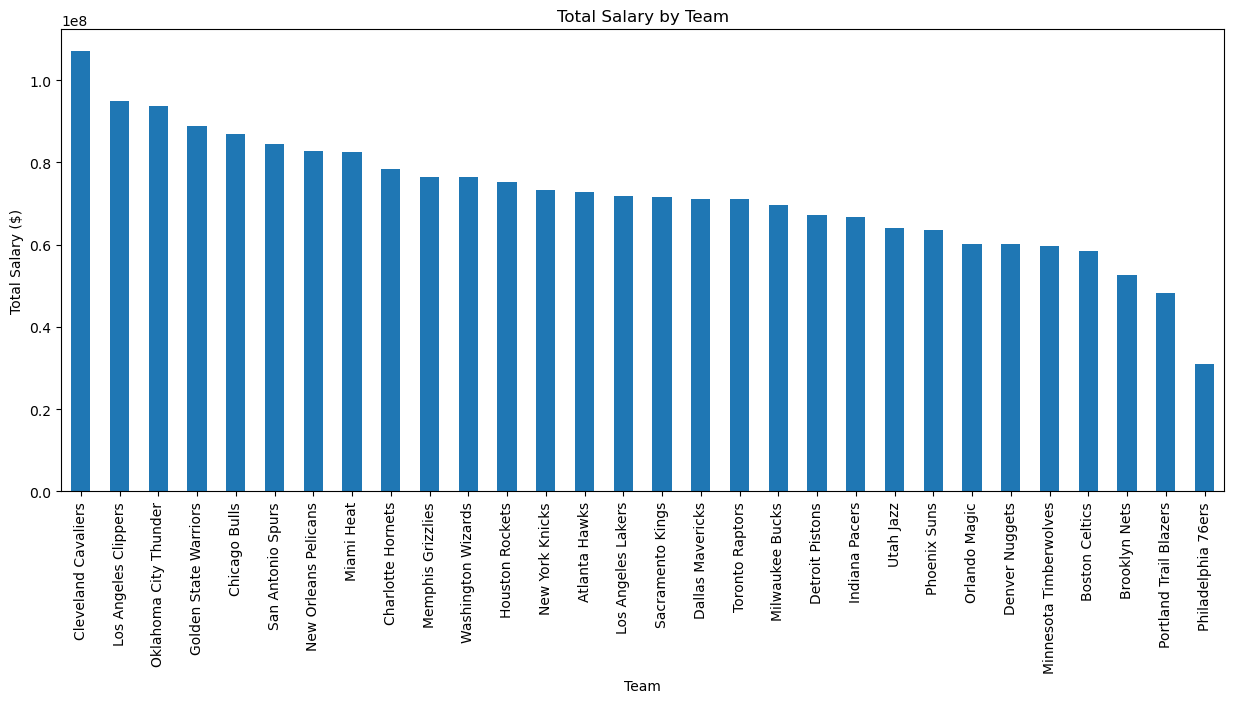

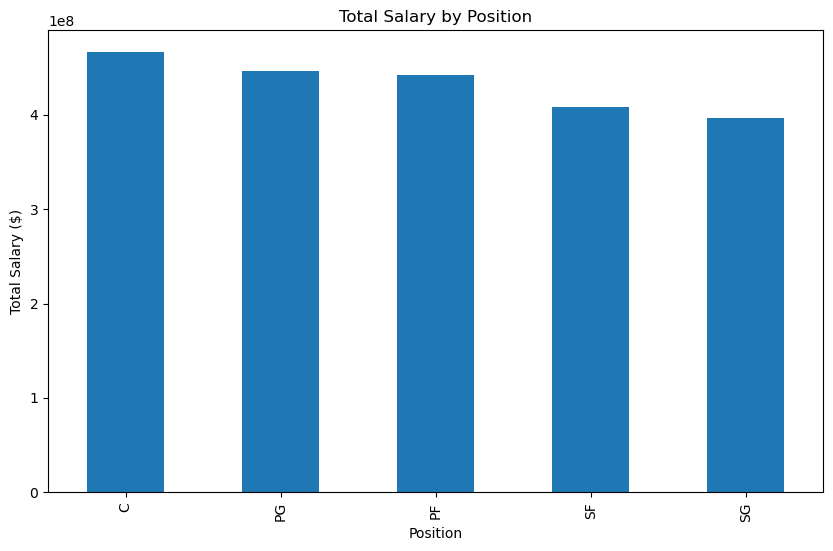

In [14]:
# Task 4: Salary Expenditure by Team/Position

# Salary by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)

# Salary by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

# Visualizations
plt.figure(figsize=(15,6))
team_salary.plot(kind='bar')
plt.title('Total Salary by Team')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
position_salary.plot(kind='bar')
plt.title('Total Salary by Position')
plt.ylabel('Total Salary ($)')
plt.show()

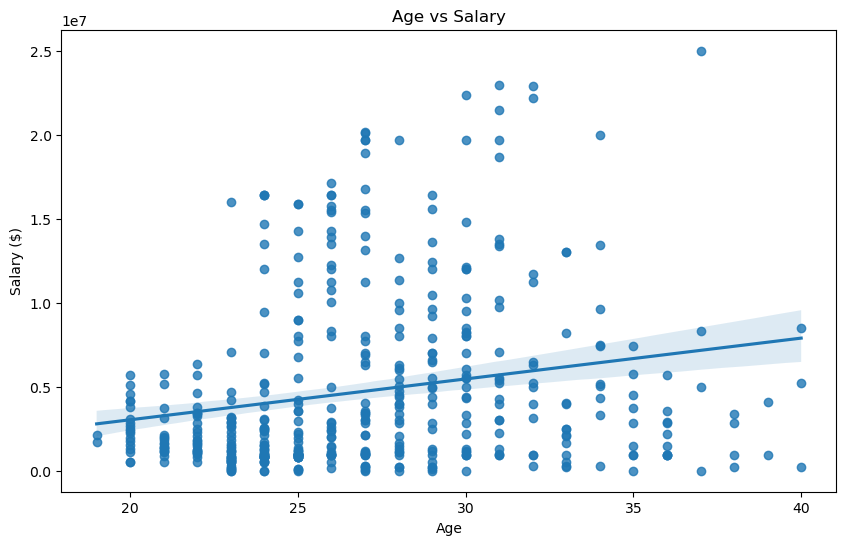

Correlation coefficient between age and salary: 0.21


In [16]:
# Task 5: Age vs Salary Correlation

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary ($)')
plt.show()

# Calculate correlation coefficient
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation coefficient between age and salary: {correlation:.2f}")